In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
# Define a function to generate clusters
def cluster_gen(n_clusters, pts_minmax=(10, 100), x_mult=(1, 4), y_mult=(1, 3), 
                             x_off=(0, 50), y_off=(0, 50)):

    # n_clusters = number of clusters to generate
    # pts_minmax = range of number of points per cluster 
    # x_mult = range of multiplier to modify the size of cluster in the x-direction
    # y_mult = range of multiplier to modify the size of cluster in the y-direction
    # x_off = range of cluster position offset in the x-direction
    # y_off = range of cluster position offset in the y-direction

    # Initialize some empty lists to receive cluster member positions
    clusters_x = []
    clusters_y = []

    # Generate random values given parameter ranges
    n_points = np.random.randint(pts_minmax[0], pts_minmax[1], n_clusters)
    x_multipliers = np.random.randint(x_mult[0], x_mult[1], n_clusters)
    y_multipliers = np.random.randint(y_mult[0], y_mult[1], n_clusters)
    x_offsets = np.random.randint(x_off[0], x_off[1], n_clusters)
    y_offsets = np.random.randint(y_off[0], y_off[1], n_clusters)

    # Generate random clusters given parameter values
    for idx, npts in enumerate(n_points):

        xpts = np.random.randn(npts) * x_multipliers[idx] + x_offsets[idx]
        ypts = np.random.randn(npts) * y_multipliers[idx] + y_offsets[idx]
        clusters_x.append(xpts)
        clusters_y.append(ypts)

    # Return cluster positions
    return clusters_x, clusters_y

In [4]:
# Generate some clusters!
n_clusters = 7
clusters_x, clusters_y = cluster_gen(n_clusters)

In [13]:
# Convert to a single dataset in OpenCV format
data = np.float32((np.concatenate(clusters_x), np.concatenate(clusters_y))).transpose()

In [25]:
# Define k-means parameters
# Number of clusters to define
k_clusters = 7
# Maximum number of iterations to perform
max_iter = 50
# Accuracy criterion for stopping iterations
epsilon = 1e-4
# Define criteria in OpenCV format
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# Call k-means algorithm on your dataset
compactness, label, center = cv2.kmeans(data, k_clusters, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

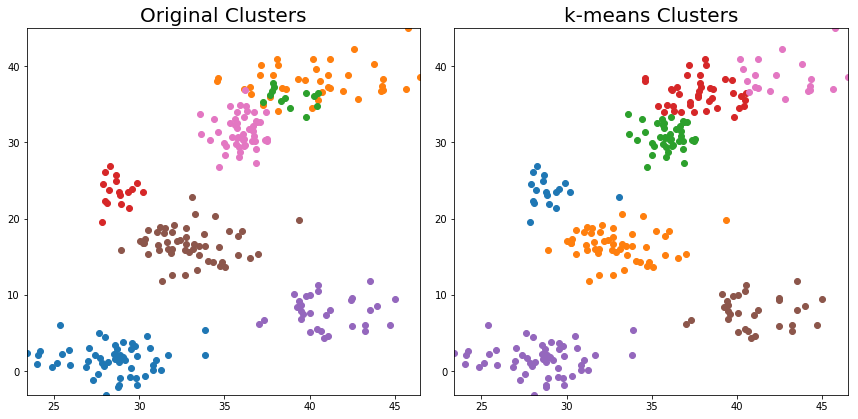

In [26]:
# Define some empty lists to receive k-means cluster points
kmeans_clusters_x = []
kmeans_clusters_y = []

# Extract k-means clusters from output
for idx in range (k_clusters):
    kmeans_clusters_x.append(data[label.ravel()==idx][:,0])
    kmeans_clusters_y.append(data[label.ravel()==idx][:,1])
    
# Plot up a comparison of original clusters vs. k-means clusters
fig = plt.figure(figsize=(12,6))
plt.subplot(121)
min_x = np.min(data[:, 0])
max_x = np.max(data[:, 0])
min_y = np.min(data[:, 1])
max_y = np.max(data[:, 1])
for idx, xpts in enumerate(clusters_x): 
    plt.plot(xpts, clusters_y[idx], 'o')
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    plt.title('Original Clusters', fontsize=20)
plt.subplot(122)
for idx, xpts in enumerate(kmeans_clusters_x):
    plt.plot(xpts, kmeans_clusters_y[idx], 'o')
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    plt.title('k-means Clusters', fontsize=20)
fig.tight_layout()
plt.subplots_adjust(left=0.03, right=0.98, top=0.9, bottom=0.05)